In [1]:
from ansys.mapdl.core import launch_mapdl
import matplotlib.pyplot as plt
import numpy as np
mapdl = launch_mapdl(nproc=4)
mapdl.nerr(10000)

PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...


NUMBER OF DISPLAYED ERRORS ALLOWED PER COMMAND=              10000
 NUMBER OF ERRORS ALLOWED PER COMMAND BEFORE ANSYS ABORT=     10000
 ABORT LEVEL KEY= -1
 ALL ERRORS WRITTEN TO C:\Users\v196m\AppData\Local\Temp\ansys_wqrchoqyfh\file0.err                                                                                                                                                                                                        
 DO NOT TERMINATE /INPUT UPON FIRST ERROR

In [2]:
mapdl.clear()

In [11]:
import numpy as np
import scipy.io as sio
X_path = r"D:/MDSI_project/PCE_surrogate/InputData/RNDNUM_building_all_uni_VAR_28_DOE_10000_SEED_2.mat"
X_rng = sio.loadmat(X_path)
X = np.array([X_rng["X"]])[0]
print(np.shape(X))


(10000, 28)


In [ ]:
# total number of paramerer: 6*4 (building) + 3 (soil) + 1 (damping) = 28
# Parameter list    = [slab ,corridor, ground, edge_wall, inner_wall, stair ]
t_para   = np.array([ 0.468 , 0.8    , 0.05  , 0.2      , 0.2       , 0.468])
e_para   = np.array([ 30e9  , 30e9   , 30e9  , 30e9     , 30e9      , 30e9])
nu_para  = np.array([ 0.27  , 0.27   , 0.27  , 0.27     , 0.27      , 0.27])
rho_para = np.array([ 2500  , 2500   , 2500  , 2500     , 2500      , 2500])

# Parameter list    = [ vs,   rho,   nu ]
soil_para = np.array([ 450, 2.3e3, 0.33])

In [5]:
from Simu_FRFs_TK import simulation
meas_FRF = simulation(mapdl,
                      Solu_type=5,
                      excitation_node=4152,
                      t_arr=t_para,
                      e_arr=e_para,
                      nu_arr=nu_para,
                      rho_arr=rho_para,
                      soil_arr=soil_para)

Start the simulation
 Setting information
     Building inner wall           :  True
     Building stair                :  True
     Building SSI                  :  True
     Element size                  :  0.4
     Solution type                 :  5
     Start frequency               :  0.001
     End frequency                 :  100
     Freqency increment            :  0.4
     Number of modes (solu_type=2) :  40
     Height of building            :  3.37
     Damping ratio                 :  0.05
     Excitation_node               :  4152
 Assigning parameter
     Rewrite thickness by input
     Rewrite Young's modulus by input
     Rewrite Poisson's ratio by input
     Rewrite Density by input
     Rewrite soil properties by input
 /PREP7 activated
     /PREP7 finished, duration 7.5549 seconds.
 /SOLU activated
     /SOLU finished, duration 145.5736 seconds.
 /POST26 actiavted
     /POST26 finished, duration 79.2637 seconds.
 Clear all the database
Simulation finished!


In [4]:
import Simu_FRFs_TK as simu
simu.build_model(mapdl,                      
                t_arr=t_para,
                e_arr=e_para,
                nu_arr=nu_para,
                rho_arr=rho_para,
                soil_arr=soil_para)
simu.solve_model(mapdl)
meas_FRF = simu.get_result(mapdl)


Building model: /PREP7
 Setting information
     Building inner wall           :  True
     Building stair                :  True
     Building SSI                  :  True
     Element size                  :  0.4
     Height of building            :  3.37
 Assigning parameter
     Rewrite thickness by input
     Rewrite Young's modulus by input
     Rewrite Poisson's ratio by input
     Rewrite Density by input
     Rewrite soil properties by input
 /PREP7 activated
     /PREP7 finished, duration 7.0832 seconds.
Solve model: /SOLU
 Setting information
     Solution type                 :  3
     Start frequency               :  0.001
     End frequency                 :  100
     Freqency increment            :  0.4
     Number of modes (solu_type=2) :  40
     Damping ratio                 :  0.05
     Building SSI                  :  True
     Height of building            :  3.37
 /SOLU activated
     /SOLU finished, duration 143.2704 seconds.
 Setting information
     Height of b

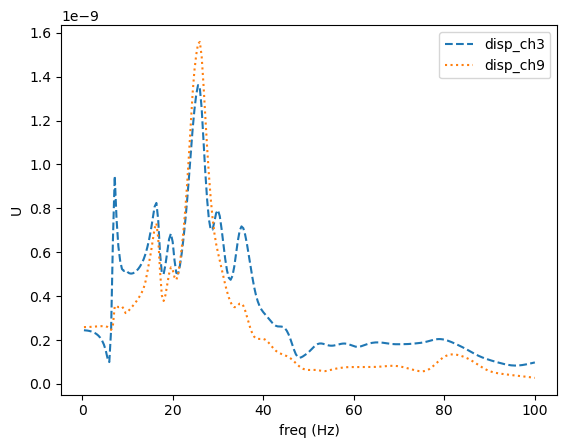

In [6]:

freq_values = meas_FRF['disp_ch3']['freq']
frf_ampl3 = meas_FRF['disp_ch3']['ampl']
plt.plot(freq_values, frf_ampl3, label="disp_ch3",linestyle="--")

frf_ampl = meas_FRF['disp_ch9']['ampl']
plt.plot(freq_values, frf_ampl, label="disp_ch9",linestyle=":")

plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("U")
plt.show()